In [1]:
# Calculate Plaintext frequencies from dictionary
plain_freqs = []
# with open('plaintext_dictionary_test1.txt', 'r') as f:
with open('Dict1.txt', 'r') as f:
    for line in f.readlines():
        if len(line) < 30: continue
        #perform frequency analysis
        freq=[0]*27
        # print()
        # print(line.strip())
        for ch in line.strip(): #update freq
            # print(ord(ch))
            if ch == ' ': freq[0] += 1
            else: freq[ord(ch) - 96] += 1
        plain_freqs.append({
            'text': line.strip(),
            'freq': freq
        })
        print(freq)
print('Dictionary Plaintext frequencies calculated')

[54, 30, 15, 22, 9, 57, 8, 7, 7, 32, 0, 5, 29, 9, 34, 20, 12, 1, 36, 44, 27, 22, 2, 5, 2, 7, 4]
[53, 33, 13, 20, 13, 47, 4, 16, 14, 33, 1, 4, 21, 8, 21, 36, 9, 0, 44, 42, 30, 15, 6, 4, 1, 9, 3]
[48, 29, 11, 24, 17, 48, 3, 13, 9, 41, 2, 4, 32, 5, 36, 32, 10, 1, 37, 36, 22, 17, 5, 5, 1, 11, 1]
[50, 37, 7, 14, 17, 50, 3, 21, 11, 41, 2, 2, 20, 21, 33, 19, 12, 0, 35, 49, 26, 16, 4, 2, 1, 6, 0]
[50, 45, 9, 15, 10, 49, 1, 12, 13, 39, 1, 9, 22, 8, 32, 25, 14, 0, 34, 40, 34, 12, 6, 7, 3, 6, 4]
Dictionary Plaintext frequencies calculated


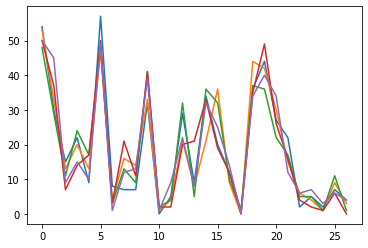

In [2]:
# Plot frequency distributions of plaintexts

import matplotlib.pyplot as plt

for ind in plain_freqs:
    plt.plot(ind['freq'])

plt.show()

In [3]:
# Convert character to index in i_arr
def ind(character):
    if character == ' ': return 0
    else: return ord(character) - 96

i_arr = [i for i in range(97,123)]
i_arr.insert(0,32)

In [4]:
import random

keyset=[]

# Generate random keys
for plain in range(len(plain_freqs)):
    key=[]
    for i in range(5):
        key.append(random.sample(i_arr, k=len(i_arr)))
    keyset.append(key)
print('Generated 5 random keys for each plaintext')

Generated 5 random keys for each plaintext


In [6]:
# Generate 5 sets of ciphertext for each plaintext, with different keys and noise levels
prob_of_random_ciphertext = [0.05, 0.1, 0.3, 0.5, 0.75]
cipherset=[]

for plain in range(len(plain_freqs)):
    ciphers=[]
    # print('******************\nPlain Text:\t', plain_freqs[plain]['text'])
    # print('\nCipher Texts:')
    for i in range(5):
        c=[]
        rprob = prob_of_random_ciphertext[i]
        #calculate ciphertext
        for ch in plain_freqs[plain]['text']:
            #add noise according to probability factor
            while random.random() <= rprob:
                c.append(chr(random.sample(i_arr, k=1)[0]))
            #add msg char
            c.append(chr(keyset[plain][i][ind(ch)]))
        ciphers.append(''.join(c))
        # print('\n', rprob, ':\t', ciphers[i])
    cipherset.append(ciphers)
print('Ciphertexts computed.')

Ciphertexts computed.
